## Descriptive Data Analysis

#### Importing 

In [2]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_quality_checks import get_total_missing_percentage, check_missing_data
from src.descriptive_statistics import describe_numerical, summarize_categorical
from src.plots import plot_numerical_histograms, plot_categorical_bar_charts, plot_numerical_histogram, plot_categorical_bar_chart, display_summary_table, plot_time_series, plot_time_series_dots

In [3]:
# Loading historical data
file_path = "../data/MachineLearningRating_v3.txt"

df = pd.read_csv(file_path, sep='|', low_memory=False)

#### Data quality check

In [4]:
# Total number rows in the dataset
len(df)

1000098

In [27]:
# compute date range in the dataset
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

min_date = df['TransactionMonth'].min()
max_date = df['TransactionMonth'].max()

df['TransactionMonth'].sort_values()
print('Date Range:')
print('Min Date:', min_date)
print('Max Date:', max_date)

df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

sorted_date_column = df['TransactionMonth'].sort_values().copy()

print(sorted_date_column)

Date Range:
Min Date: 2013-10-01 00:00:00
Max Date: 2015-08-01 00:00:00
940333   2013-10-01
984681   2013-10-01
947604   2013-10-01
956801   2013-10-01
969357   2013-10-01
            ...    
309880   2015-08-01
373560   2015-08-01
253091   2015-08-01
123683   2015-08-01
115708   2015-08-01
Name: TransactionMonth, Length: 1000098, dtype: datetime64[ns]


In [28]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_cols)

['Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'VehicleType', 'make', 'Model', 'bodytype', 'VehicleIntroDate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'TermFrequency', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType']


In [29]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print(numerical_cols)

['UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'mmcode', 'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'CustomValueEstimate', 'NumberOfVehiclesInFleet', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']


In [31]:
numerical_cols = [ 'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'CustomValueEstimate', 'NumberOfVehiclesInFleet', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']

categorical_cols = ['UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'mmcode','Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'VehicleType', 'make', 'Model', 'bodytype', 'VehicleIntroDate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'TermFrequency', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType']

df_numerical_cols = df[numerical_cols]
print(len(df_numerical_cols.columns))
df_categorical_cols = df[categorical_cols]
print(len(df_categorical_cols.columns))

11
39


In [6]:
# checking data types
df.dtypes

UnderwrittenCoverID                  int64
PolicyID                             int64
TransactionMonth            datetime64[ns]
IsVATRegistered                       bool
Citizenship                         object
LegalType                           object
Title                               object
Language                            object
Bank                                object
AccountType                         object
MaritalStatus                       object
Gender                              object
Country                             object
Province                            object
PostalCode                           int64
MainCrestaZone                      object
SubCrestaZone                       object
ItemType                            object
mmcode                             float64
VehicleType                         object
RegistrationYear                     int64
make                                object
Model                               object
Cylinders  

In [7]:
# checking for columns with missing values
missing_data = check_missing_data(df)
print(missing_data)

                Column Name  Missing Values  Percentage Missing
8                      Bank          145961           14.594670
9               AccountType           40232            4.022806
10            MaritalStatus            8259            0.825819
11                   Gender            9536            0.953507
18                   mmcode             552            0.055195
19              VehicleType             552            0.055195
21                     make             552            0.055195
22                    Model             552            0.055195
23                Cylinders             552            0.055195
24            cubiccapacity             552            0.055195
25                kilowatts             552            0.055195
26                 bodytype             552            0.055195
27            NumberOfDoors             552            0.055195
28         VehicleIntroDate             552            0.055195
29      CustomValueEstimate          779

In [8]:
# check total missing values percentage in the dataset
missing_values = get_total_missing_percentage(df)
print(missing_values)

9.74452195992485


#### Descriptive statistcs & Summerization 

In [9]:
# descriptive analysis for numerical datasets
numerical_desc_analysis = describe_numerical(df)
display_summary_table(numerical_desc_analysis)


UnderwrittenCoverID:
+----+---------+-----------------------+
|    | index   |   UnderwrittenCoverID |
|----+---------+-----------------------|
|  0 | count   |            1.0001e+06 |
|  1 | mean    |       104818          |
|  2 | std     |        63293.7        |
|  3 | min     |            1          |
|  4 | 25%     |        55143          |
|  5 | 50%     |        94083          |
|  6 | 75%     |       139190          |
|  7 | max     |       301175          |
+----+---------+-----------------------+

PolicyID:
+----+---------+----------------+
|    | index   |       PolicyID |
|----+---------+----------------|
|  0 | count   |     1.0001e+06 |
|  1 | mean    |  7956.68       |
|  2 | std     |  5290.04       |
|  3 | min     |    14          |
|  4 | 25%     |  4500          |
|  5 | 50%     |  7071          |
|  6 | 75%     | 11077          |
|  7 | max     | 23246          |
+----+---------+----------------+

PostalCode:
+----+---------+---------------+
|    | index   |    P

In [10]:
# summerization for categorical datasets
categorical_summary = summarize_categorical(df)
display_summary_table(categorical_summary)


Citizenship:
+----+---------------+---------+
|    | Citizenship   |   count |
|----+---------------+---------|
|  0 |               |  895210 |
|  1 | ZA            |  103721 |
|  2 | ZW            |     936 |
|  3 | AF            |     231 |
+----+---------------+---------+

LegalType:
+----+-------------------+---------+
|    | LegalType         |   count |
|----+-------------------+---------|
|  0 | Individual        |  911929 |
|  1 | Private company   |   83891 |
|  2 | Close Corporation |    2459 |
|  3 | Public company    |    1295 |
|  4 | Partnership       |     331 |
|  5 | Sole proprieter   |     193 |
+----+-------------------+---------+

Title:
+----+---------+---------+
|    | Title   |   count |
|----+---------+---------|
|  0 | Mr      |  933555 |
|  1 | Mrs     |   45850 |
|  2 | Ms      |   13269 |
|  3 | Miss    |    6614 |
|  4 | Dr      |     810 |
+----+---------+---------+

Language:
+----+------------+---------+
|    | Language   |   count |
|----+------------

#### Relevant columns

In [11]:
# Define related column groups

insurance_policy_columns = ['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth']
client_columns = ['IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender']
client_location_columns = ['Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone']
car_insured_columns = ['ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet']
plan_columns = ['SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType']
payment_claim_columns = ['TotalPremium', 'TotalClaims']

df_insurance_policy = df[insurance_policy_columns]
df_client = df[client_columns]
df_client_location = df[client_location_columns]
df_car_insured = df[car_insured_columns]
df_plan = df[plan_columns]
df_payment_claim = df[payment_claim_columns]

<bound method Series.max of 0         2015-03-01
1         2015-05-01
2         2015-07-01
3         2015-05-01
4         2015-07-01
             ...    
1000093   2015-04-01
1000094   2015-06-01
1000095   2015-08-01
1000096   2014-07-01
1000097   2015-02-01
Name: TransactionMonth, Length: 1000098, dtype: datetime64[ns]>
<bound method Series.min of 0         2015-03-01
1         2015-05-01
2         2015-07-01
3         2015-05-01
4         2015-07-01
             ...    
1000093   2015-04-01
1000094   2015-06-01
1000095   2015-08-01
1000096   2014-07-01
1000097   2015-02-01
Name: TransactionMonth, Length: 1000098, dtype: datetime64[ns]>


#### Univariate analysis

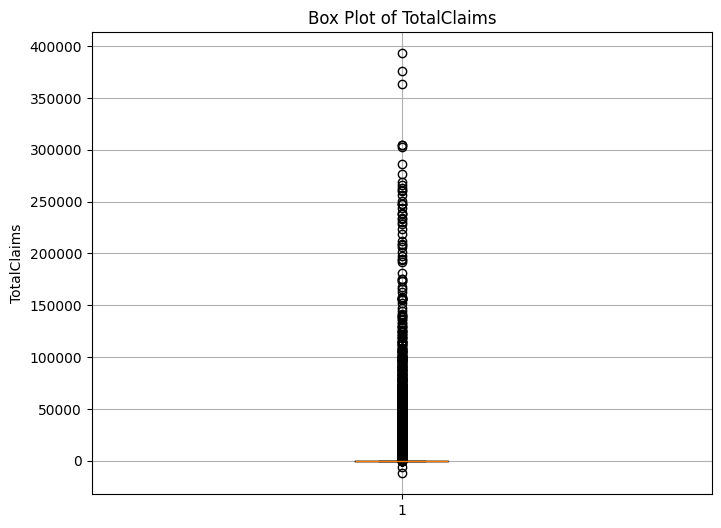

In [23]:
def plot_numerical_boxplot(df, col):
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

plot_numerical_boxplot(df, 'TotalClaims')

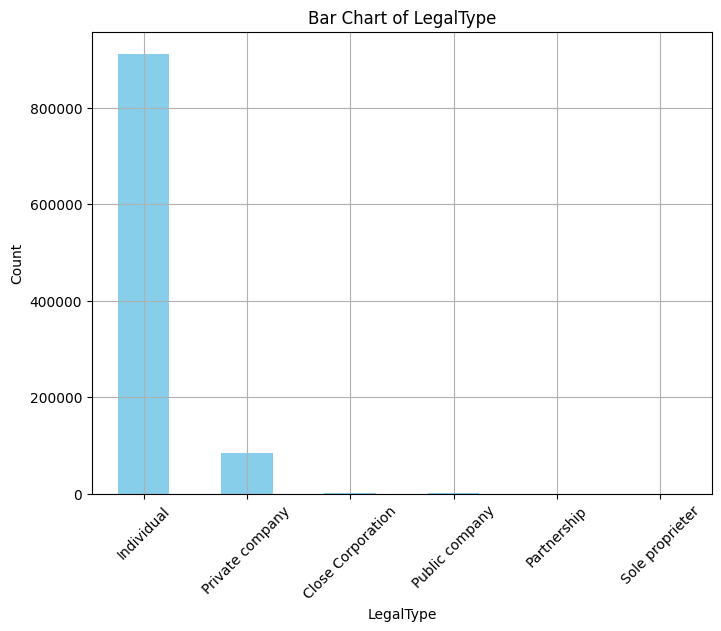

In [17]:
plot_categorical_bar_chart(df_client, 'LegalType')

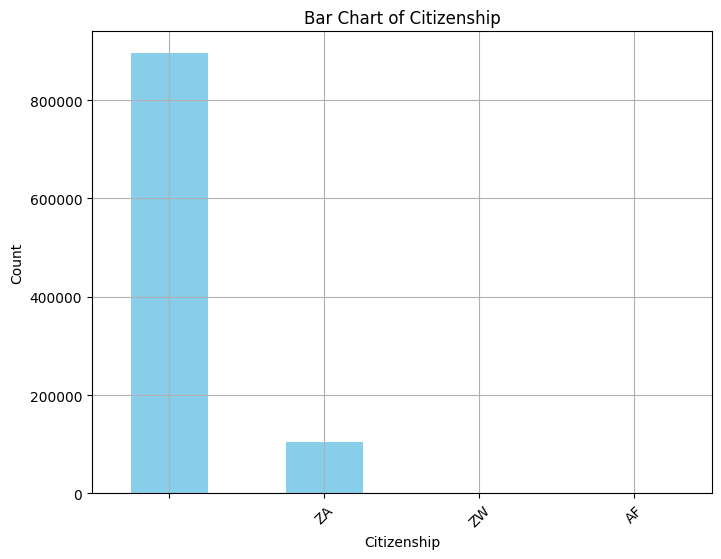

In [19]:
plot_categorical_bar_chart(df, 'Citizenship')

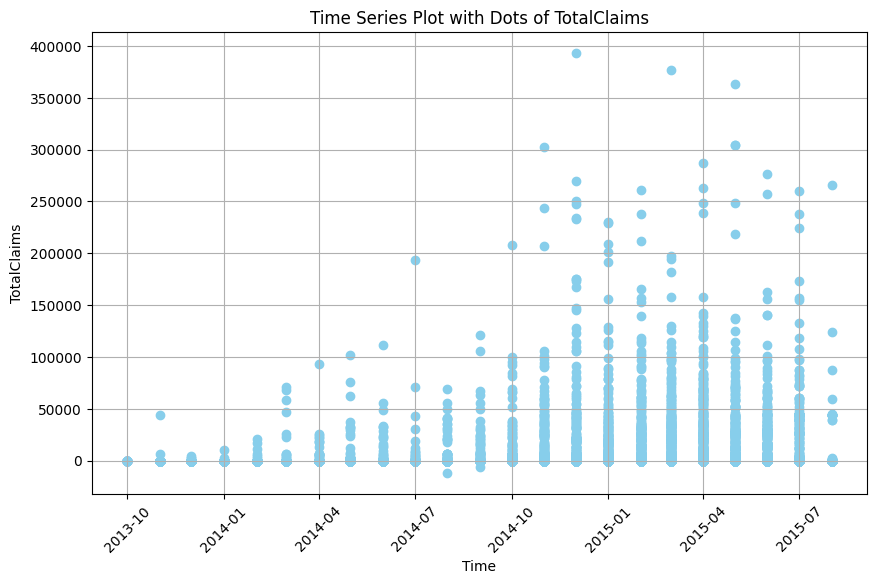

In [12]:
plot_time_series_dots(df, 'TransactionMonth', 'TotalClaims')

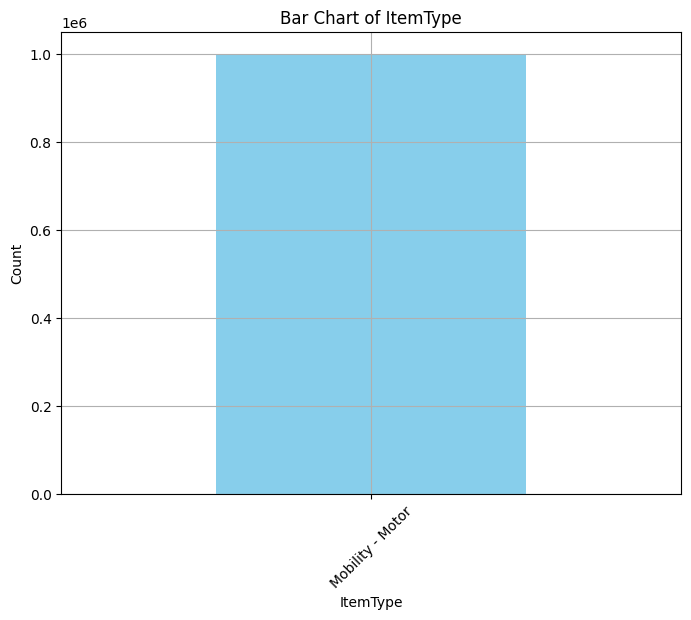

In [21]:
plot_categorical_bar_chart(df_car_insured, 'ItemType')